Shivani Verma (40821105)

# LAB 1

# Comparing different classification algorithms 

Using HR Attrition data set

Shivani Verma (40821105)

In [74]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
#import dataset
data = pd.read_csv(r"C:\Users\HP\Downloads\WA_Fn-UseC_-HR-Employee-Attrition.csv")
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


EDA and Data Preprocessing

In [76]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [77]:
#check null value in the dataset
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [78]:
#drop two coloumns
data_ = data.drop(['EmployeeCount','EmployeeNumber'], axis=1)

In [79]:
#covert yes and no into integer data
# 1 for yes and 0 for no
attrition_new = pd.get_dummies(data_['Attrition'])
attrition_new.head()

,No,Yes
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [80]:
#concatinate above two columns in data
data_new = pd.concat([data_, attrition_new], axis=1)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [81]:
# drop insufficient coloumns
df = data_new.drop(['Attrition','No'], axis=1)

In [82]:
#data preprocessing
#covert string coloumns into integers
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    if df[column].dtype==np.number:
        continue
    else:
        df[column]=LabelEncoder().fit_transform(df[column])

C:\Users\HP\AppData\Local\Temp/ipykernel_8288/3969220936.py:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:


<AxesSubplot:>

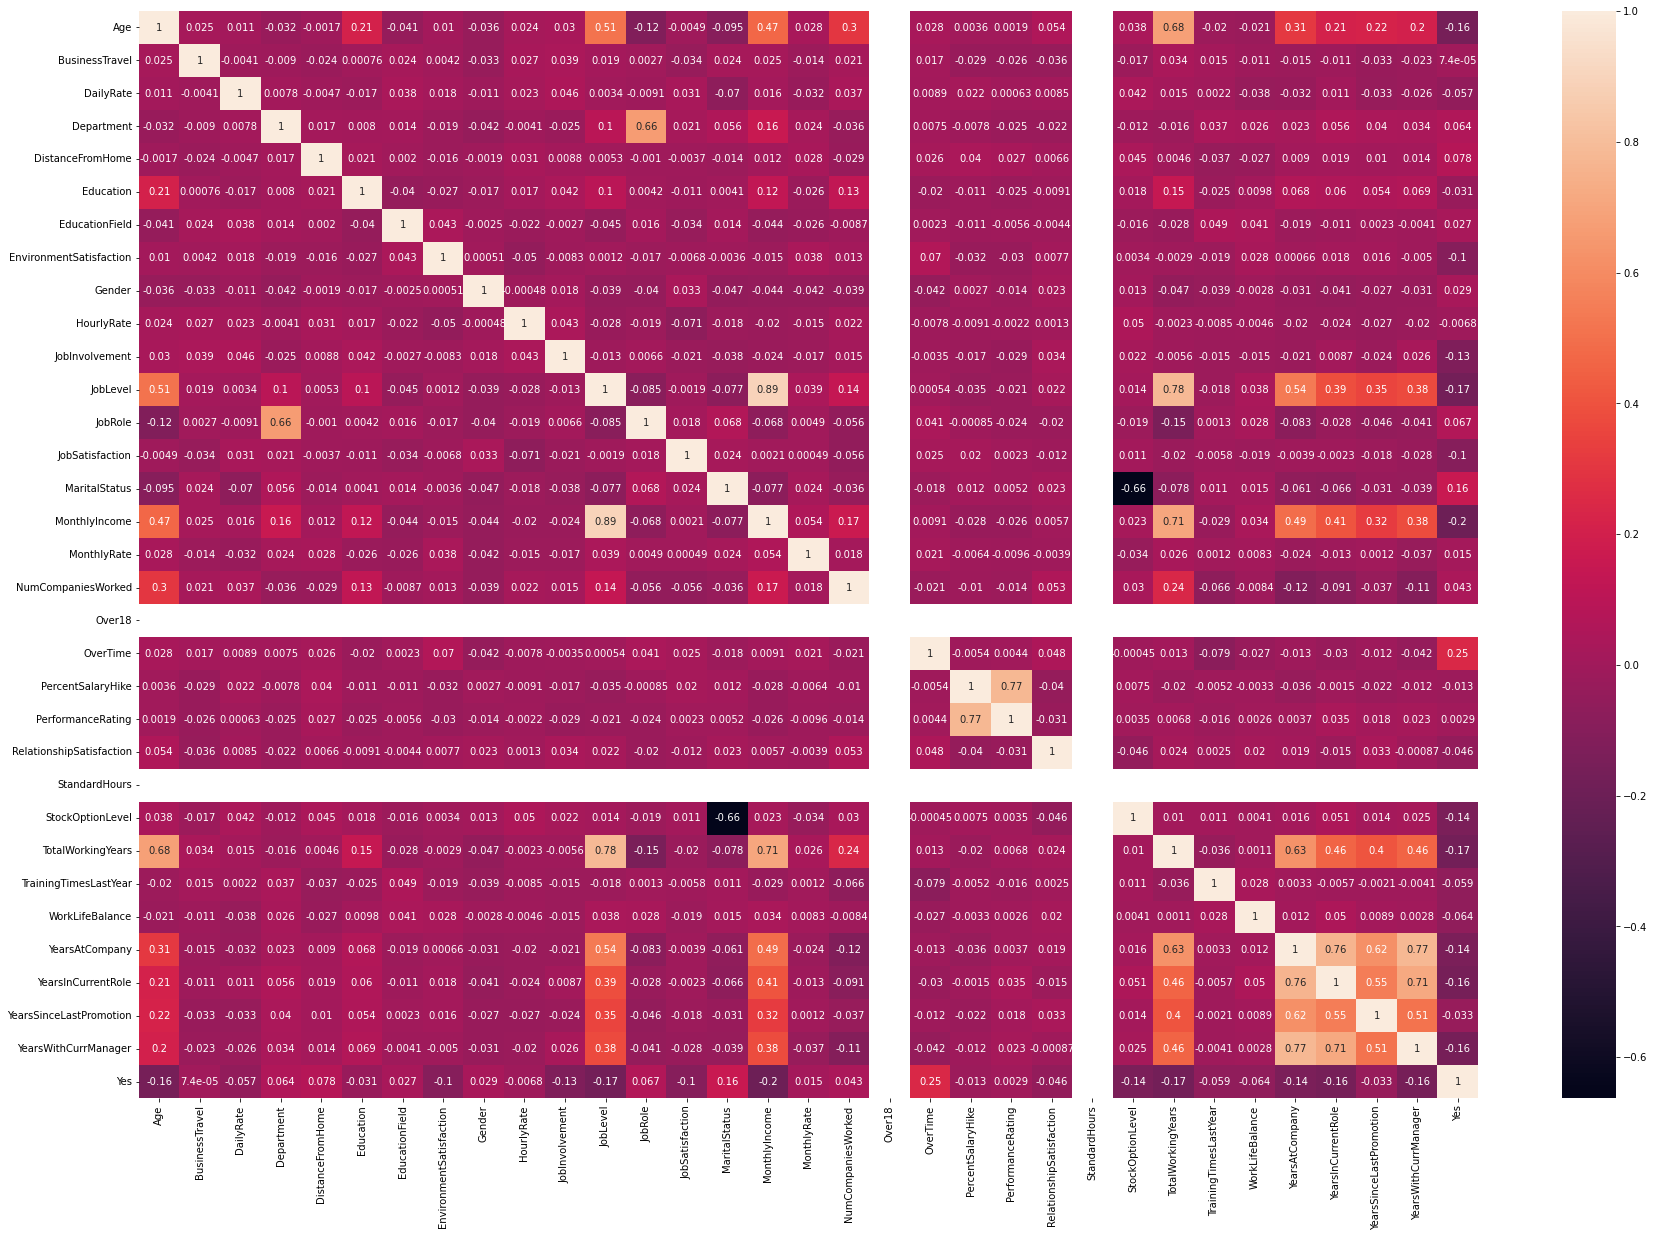

In [83]:
#crete heat map to check the correlation between coloumns
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True)

In [84]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Yes
0,23,2,624,2,0,1,1,1,0,64,...,0,0,8,0,0,6,4,0,5,1
1,31,1,113,1,7,0,1,2,1,31,...,0,1,10,3,2,10,7,1,7,0
2,19,2,805,1,1,1,4,3,1,62,...,0,0,7,3,2,0,0,0,0,1
3,15,1,820,1,2,3,1,3,0,26,...,0,0,8,3,2,8,7,3,0,0
4,9,2,312,1,1,0,3,0,1,10,...,0,1,6,3,2,2,2,2,2,0


Splitting

In [85]:
from sklearn.model_selection import train_test_split
X = df.drop(['Yes'], axis=1)
Y = df['Yes']

In [86]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

In [87]:
X_train.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
338,12,2,295,2,4,2,2,3,0,0,...,2,0,3,10,2,2,10,9,1,2
363,15,2,159,2,4,2,2,3,0,4,...,1,0,0,1,2,2,1,0,0,0
759,27,2,437,0,23,3,3,1,1,6,...,0,0,0,6,3,2,6,3,0,4
793,10,2,502,1,14,1,1,0,1,20,...,3,0,1,4,5,1,4,2,2,2
581,12,2,516,1,0,2,1,3,1,8,...,2,0,2,7,2,2,2,2,0,2


Logistic Regression

In [88]:
from sklearn.linear_model import LogisticRegression  
# Creating an instance of the class Logistic Regression model  
lr = LogisticRegression()
# Fitting the dataset
Model = lr.fit(X_train, Y_train)
Y_pred = Model.predict(X_test)
Y_pred

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [89]:
from sklearn.metrics import accuracy_score
from sklearn import metrics 
LinearRegression_Accuracy = metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.8435374149659864
Precision: 0.5333333333333333
Recall: 0.11428571428571428


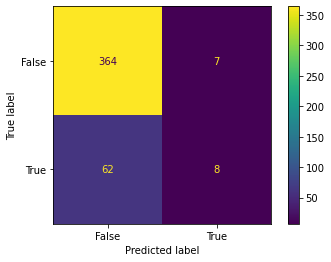

In [90]:
from sklearn.metrics import confusion_matrix
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

Decision Tree

In [91]:
from sklearn.tree import DecisionTreeClassifier
# Initialize decision tree model
dt = DecisionTreeClassifier()
# Fit the model to the training data
dt.fit(X_train, Y_train)
# Predict the labels of the test data
Y_pred = dt.predict(X_test)
DecisionTree_Accuracy = metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.782312925170068
Precision: 0.32894736842105265
Recall: 0.35714285714285715


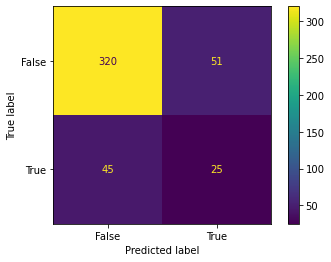

In [92]:
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

KNN

In [93]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
# Fit the model to the training data
knn.fit(X_train, Y_train)
# Predict the labels of the test data
Y_pred = knn.predict(X_test)
KNN_Accuracy = metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.8208616780045351
Precision: 0.2631578947368421
Recall: 0.07142857142857142


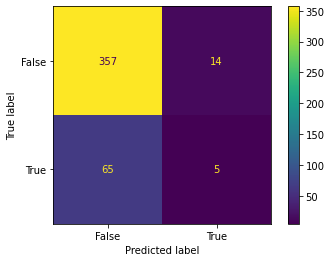

In [94]:
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

Random Forest

In [95]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
# Fit the model to the training data
rfc.fit(X_train, Y_train)
# Predict the labels of the test data
Y_pred = rfc.predict(X_test)
RandomForest_Accuracy = metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.8662131519274376
Precision: 0.8235294117647058
Recall: 0.2


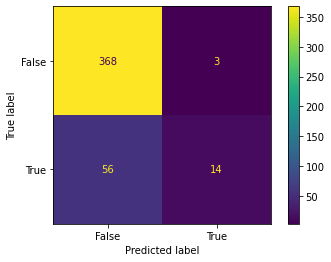

In [96]:
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

Naive Bayes

In [97]:
from sklearn.naive_bayes import GaussianNB
# Initialize Gaussian Naive Bayes classifier model
gnb = GaussianNB()
# Fit the model to the training data
gnb.fit(X_train, Y_train)
# Predict the labels of the test data
Y_pred = gnb.predict(X_test)
NaiveBayes_Accuracy = metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.8095238095238095
Precision: 0.4326923076923077
Recall: 0.6428571428571429


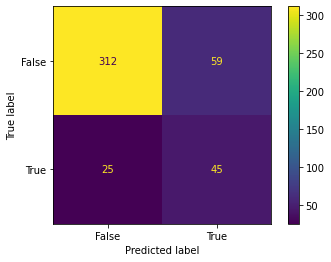

In [98]:
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

KMeans

In [99]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X_train)
Y_pred = kmeans.predict(X_test)
KMeans_Accuracy = metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Accuracy: 0.47165532879818595
Precision: 0.14096916299559473
Recall: 0.45714285714285713


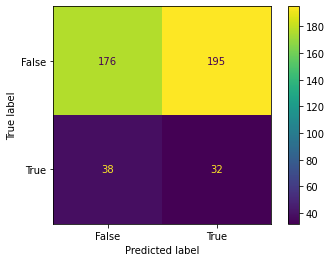

In [100]:
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

Bagging(using decision tree as a base classifier)

In [101]:
from sklearn.ensemble import BaggingClassifier
# Define the base classifier
base_clf = DecisionTreeClassifier()
# Define the bagging classifier
bag_clf = BaggingClassifier(base_estimator=base_clf, n_estimators=10, random_state=42)
# Fit the bagging classifier on the training data
bag_clf.fit(X_train, Y_train)
# Predict the labels of the test data
Y_pred = bag_clf.predict(X_test)
Bagging_Accuracy = metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.8526077097505669
Precision: 0.5757575757575758
Recall: 0.2714285714285714


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


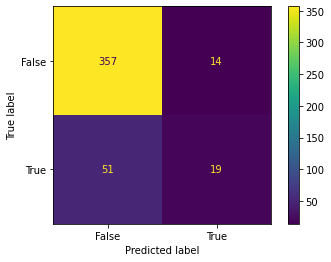

In [102]:
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

Boosting

In [103]:
from sklearn.ensemble import GradientBoostingClassifier
# initialize the classifier
clf = GradientBoostingClassifier(random_state=42)
# train the classifier on the training data
clf.fit(X_train, Y_train)
# make predictions on the testing data
Y_pred = clf.predict(X_test)
Boosting_Accuracy = metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.8798185941043084
Precision: 0.7575757575757576
Recall: 0.35714285714285715


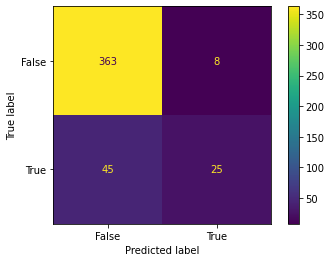

In [104]:
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show(
)

Report

To predict whether an employee will leave the company or not, we can use classification algorithms such as logistic regression, decision trees, k-nearest neighbors (KNN), random forest, and Naive Bayes, etc... In order to compare the performance of these algorithms, we will use a dataset of employee iteration.


In [108]:
print('LinearRegression_Accuracy: ',LinearRegression_Accuracy)
print('DecisionTree_Accuracy: ',DecisionTree_Accuracy)
print('KNN_Accuracy: ',KNN_Accuracy)
print('KMeans_Accuracy: ',KMeans_Accuracy)
print('Bagging_Accuracy: ',Bagging_Accuracy)
print('Boosting_Accuracy: ',Boosting_Accuracy)
print('RandomForest_Accuracy: ',RandomForest_Accuracy)
print('NaiveBayes_Accuracy: ',NaiveBayes_Accuracy)

LinearRegression_Accuracy:  0.8435374149659864
DecisionTree_Accuracy:  0.782312925170068
KNN_Accuracy:  0.8208616780045351
KMeans_Accuracy:  0.47165532879818595
Bagging_Accuracy:  0.8526077097505669
Boosting_Accuracy:  0.8798185941043084
RandomForest_Accuracy:  0.8662131519274376
NaiveBayes_Accuracy:  0.8095238095238095


Based on above results, we can see that the Boosting algorithm performed the best with an accuracy of 0.87